In [3]:
from keras.preprocessing.image import ImageDataGenerator

dataGen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# train 디렉토리 내 cats 디렉토리 내의 모든 파일의 경로를 리스트로 저장하시오
import os
train_cats_dir = '/content/drive/MyDrive/딥러닝/data/cats_and_dogs/data/train/cats'
cats_lst=os.listdir(train_cats_dir)
cats_lst[:5]

['cat.488.jpg', 'cat.581.jpg', 'cat.504.jpg', 'cat.657.jpg', 'cat.624.jpg']

In [17]:
cat_img_lst = []
for cat_img_name in cats_lst:
  cat_img_path = train_cats_dir+'/'+cat_img_name
  # print(cat_img_path)
  cat_img_lst.append(cat_img_path)

cat_img_lst[:5]

['/content/drive/MyDrive/딥러닝/data/cats_and_dogs/data/train/cats/cat.488.jpg',
 '/content/drive/MyDrive/딥러닝/data/cats_and_dogs/data/train/cats/cat.581.jpg',
 '/content/drive/MyDrive/딥러닝/data/cats_and_dogs/data/train/cats/cat.504.jpg',
 '/content/drive/MyDrive/딥러닝/data/cats_and_dogs/data/train/cats/cat.657.jpg',
 '/content/drive/MyDrive/딥러닝/data/cats_and_dogs/data/train/cats/cat.624.jpg']

In [18]:
fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])
fnames[0]

'/content/drive/MyDrive/딥러닝/data/cats_and_dogs/data/train/cats/cat.0.jpg'

In [21]:
img_path = fnames[3]
img_path

'/content/drive/MyDrive/딥러닝/data/cats_and_dogs/data/train/cats/cat.100.jpg'

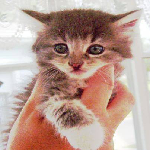

In [22]:
from keras.preprocessing import image

img = image.load_img(img_path, target_size=(150, 150))
img

In [24]:
# (150, 150, 3)
x = image.img_to_array(img)
x[0, :3]

array([[222., 223., 218.],
       [223., 224., 219.],
       [223., 224., 219.]], dtype=float32)

In [ ]:
# (1, 150, 150, 3)

x = x.reshape((1, )+x.shape)
x[0, :3]

In [ ]:
import matplotlib.pyplot as plt

i = 0
for batch in dataGen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [32]:
# 모델 만들기
from keras import layers
from keras import models
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add( layers.MaxPooling2D((2,2)))
model.add( layers.Conv2D(64, (3,3), activation='relu'))
model.add( layers.MaxPooling2D((2,2)))
model.add( layers.Conv2D(128, (3,3), activation='relu'))
model.add( layers.MaxPooling2D((2,2)))
model.add( layers.Conv2D(128, (3,3), activation='relu'))
model.add( layers.MaxPooling2D((2,2)))
model.add( layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add( layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
               optimizer=optimizers.RMSprop(learning_rate=0.0001),
               metrics=['acc'])

In [35]:
train_dataGen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_dataGen = ImageDataGenerator(rescale=1./255)

In [38]:
base_path='/content/drive/MyDrive/딥러닝/data/cats_and_dogs/data'
train_dir = base_path+'/train'

train_generator = train_dataGen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=20, class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [42]:
validation_dir = base_path+'/validation'
validation_generator = test_dataGen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [45]:
history = model.fit_generator(
    train_generator, steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/100


UnimplementedError: ignored